# AMES HOUSE PRICE PREDICTION

## Imports
Import all required modules for linear regression

In [1]:
pip install scikit-learn

In [ ]:
pip install xgboost

In [497]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [812]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
from time import time
from xgboost import XGBRegressor
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor

## Training Data Load

In [595]:
#Load the training data from csv file and store in a dataframe.
df_train = pd.read_csv("../Dataset/train.csv")

## Data Exploration and Visualization

In [596]:
df_train.shape

(2197, 82)

In [597]:
pd.set_option('display.max_columns', None)
df_train.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,534,531363010,20,RL,80.0,9605,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,6,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1218.0,1218.0,GasA,Ex,Y,SBrkr,1218,0,0,1218,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Detchd,2007.0,RFn,2.0,576.0,TA,TA,Y,0,178,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,Normal,159000
1,803,906203120,20,RL,90.0,14684,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,7,1990,1991,Hip,CompShg,HdBoard,HdBoard,BrkFace,234.0,Gd,TA,CBlock,Gd,TA,Mn,ALQ,485.0,BLQ,177.0,1496.0,2158.0,GasA,Gd,Y,SBrkr,2196,0,0,2196,0.0,0.0,2,0,3,1,Gd,7,Typ,1,TA,Attchd,1990.0,RFn,3.0,701.0,TA,TA,Y,84,70,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,271900
2,956,916176030,20,RL,NaN,14375,Pave,NaN,IR1,Lvl,NoSeWa,CulDSac,Gtl,Timber,Norm,Norm,1Fam,SLvl,6,6,1958,1958,Gable,CompShg,HdBoard,HdBoard,BrkFace,541.0,TA,TA,CBlock,TA,TA,No,GLQ,111.0,Rec,354.0,354.0,819.0,GasA,Gd,Y,FuseA,1344,0,0,1344,0.0,1.0,1,0,3,1,Gd,7,Typ,1,Gd,Basment,1958.0,RFn,2.0,525.0,TA,TA,Y,0,118,0,0,233,0,NaN,NaN,NaN,0,1,2009,COD,Abnorml,137500
3,460,528180130,120,RL,48.0,6472,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,TwnhsE,1Story,9,5,2008,2008,Hip,CompShg,VinylSd,VinylSd,BrkFace,500.0,Ex,TA,PConc,Ex,TA,No,Unf,0.0,Unf,0.0,1451.0,1451.0,GasA,Ex,Y,SBrkr,1456,0,0,1456,0.0,0.0,2,0,2,1,Ex,6,Typ,1,Gd,Attchd,2008.0,RFn,2.0,539.0,TA,TA,Y,192,42,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,Normal,248500
4,487,528290030,80,RL,61.0,9734,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,RRAn,Norm,1Fam,SLvl,7,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,241.0,Rec,113.0,30.0,384.0,GasA,Ex,Y,SBrkr,744,630,0,1374,0.0,0.0,2,1,3,1,Gd,7,Typ,0,NaN,BuiltIn,2004.0,Fin,2.0,400.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal,167000


In [599]:
#Check the major mathematical values for all the features.
df_train.describe(include = 'all')

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
count,2197.000000,2.197000e+03,2197.000000,2197,1835.000000,2197.000000,2197,143,2197,2197,2197,2197,2197,2197,2197,2197,2197,2197,2197.000000,2197.000000,2197.000000,2197.000000,2197,2197,2197,2197,2175,2175.000000,2197,2197,2197,2130,2130,2128,2130,2196.000000,2129,2196.000000,2196.000000,2196.000000,2197,2197,2197,2196,2197.000000,2197.00000,2197.000000,2197.000000,2196.000000,2196.000000,2197.000000,2197.000000,2197.000000,2197.000000,2197,2197.000000,2197,2197.000000,1131,2077,2075.000000,2075,2196.000000,2196.000000,2075,2075,2197,2197.000000,2197.000000,2197.000000,2197.000000,2197.000000,2197.000000,12,419,80,2197.000000,2197.000000,2197.000000,2197,2197,2197.000000
unique,NaN,NaN,NaN,7,NaN,NaN,2,2,4,4,3,5,3,28,9,8,5,8,NaN,NaN,NaN,NaN,6,8,16,17,5,NaN,4,5,6,5,5,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,8,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,4,4,5,NaN,NaN,NaN,10,6,NaN
top,NaN,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,Gd,TA,No,GLQ,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,NaN,1704,NaN,NaN,2188,87,1389,1983,2194,1597,2091,324,1894,2175,1815,1123,NaN,NaN,NaN,NaN,1735,2166,790,782,1307,NaN,1321,1922,1001,930,1970,1406,664,NaN,1871,NaN,NaN,NaN,2158,1126,2048,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1105,NaN,2037,NaN,564,1318,NaN,902,NaN,NaN,1957,1993,1986,NaN,NaN,NaN,NaN,NaN,NaN,4,243,72,NaN,NaN,NaN,1898,1809,NaN
mean,1460.512517,7.127872e+08,57.064178,NaN,69.549319,10268.070096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.116523,5.552572,1972.030951,1984.781065,NaN,NaN,NaN,NaN,NaN,105.101609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,445.502277,NaN,49.341985,567.176685,1062.020947,NaN,NaN,NaN,NaN,1171.744652,331.93218,4.196632,1507.873464,0.425774,0.063297,1.592626,0.369595,2.858898,1.049158,NaN,6.470642,NaN,0.598999,NaN,NaN,1978.890120,NaN,1.781876,476.715847,NaN,NaN,NaN,92.436959,48.768320,22.393719,2.361402,15.954028,2.789713,NaN,NaN,NaN,57.404188,6.189804,2007.793810,NaN,NaN,182376.851161
std,846.537251,1.887751e+08,42.360690,NaN,23.188224,7975.740885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.429613,1.107019,30.450069,20.898245,NaN,NaN,NaN,NaN,NaN,184.897165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,465.845264,NaN,170.644815,445.327392,456.535482,NaN,NaN,NaN,NaN,398.204596,430.76106,45.896142,511.844406,0.524958,0.249100,0.553347,0.500405,0.834769,0.224512,NaN,1.591381,NaN,0.647862,NaN,NaN,25.753701,NaN,0.762599,215.999290,NaN,NaN,NaN,121.422842,69.127588,62.063281,22.843004,56.495484,39.991010,NaN,NaN,NaN,639.103790,2.746902,1.314345,NaN,NaN,81168.157405
min,1.000000,5.263011e+08,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.00000

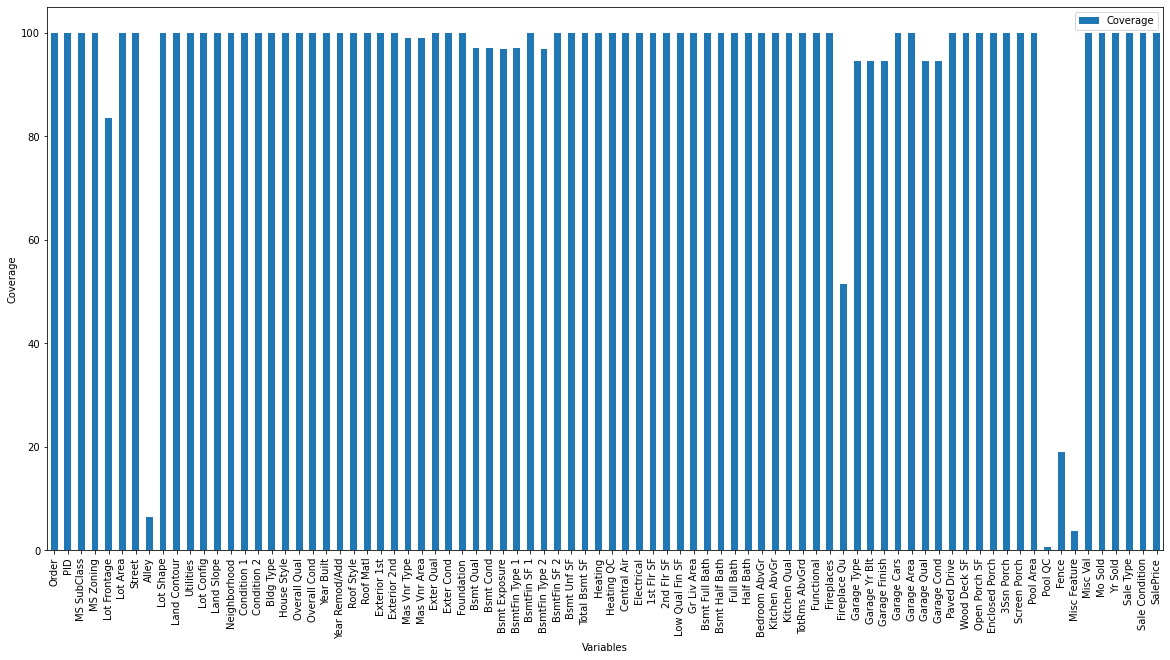

In [600]:
#Graphical representation of the existing features
ax = pd.DataFrame((df_train.count()/df_train.shape[0])*100 , columns=['Coverage']).plot(kind = 'bar' , figsize = (20,10))
ax.set(xlabel = 'Variables' , ylabel = 'Coverage')
plt.show()

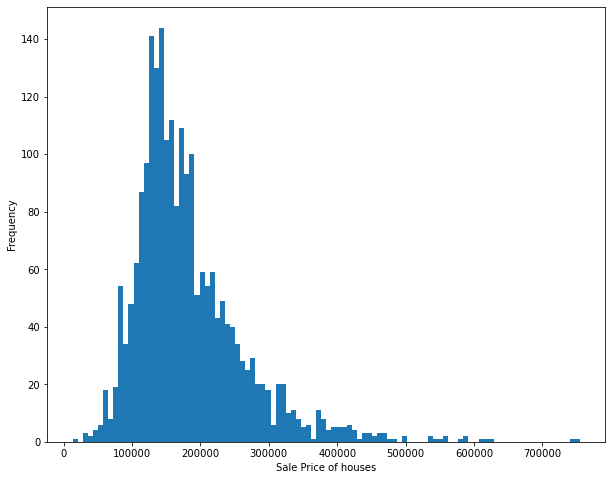

In [601]:
#Plot a graph to depict the frequency of the house prices
df_train["SalePrice"].plot.hist(bins = 100 , figsize = (10 , 8)).set(xlabel = 'Sale Price of houses')
plt.show()

In [602]:
#Check correlation to SalePrice feature as our model will predict the sale price of a house
df_train.corr()['SalePrice'].sort_values()

PID               -0.260739
Enclosed Porch    -0.147630
Kitchen AbvGr     -0.129349
Overall Cond      -0.098890
MS SubClass       -0.094083
Low Qual Fin SF   -0.055201
Order             -0.040828
Bsmt Half Bath    -0.032125
Yr Sold           -0.024833
Misc Val          -0.011581
BsmtFin SF 2       0.021196
3Ssn Porch         0.031649
Mo Sold            0.035575
Pool Area          0.075599
Screen Porch       0.119207
Bedroom AbvGr      0.144923
Bsmt Unf SF        0.176705
2nd Flr SF         0.264890
Lot Area           0.269321
Bsmt Full Bath     0.279532
Half Bath          0.281398
Open Porch SF      0.320682
Wood Deck SF       0.343644
Lot Frontage       0.361904
BsmtFin SF 1       0.440001
Fireplaces         0.485029
TotRms AbvGrd      0.486375
Mas Vnr Area       0.513758
Garage Yr Blt      0.518554
Year Remod/Add     0.531341
Full Bath          0.547815
Year Built         0.559975
1st Flr SF         0.619164
Total Bsmt SF      0.629263
Garage Area        0.637427
Garage Cars        0

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

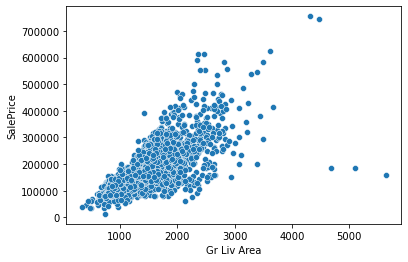

In [603]:
#Visualize the data to see if there are any outliers
sb.scatterplot(x='Gr Liv Area', y='SalePrice', data=df_train)

In [604]:
#Check the percentage coverage of data (percentage of data which does contain NaN)
pd.set_option('display.max_rows', 100)
pd.DataFrame((df_train.count()/df_train.shape[0])*100 , columns=['Coverage'])

,Coverage
Order,100.000000
PID,100.000000
MS SubClass,100.000000
MS Zoning,100.000000
Lot Frontage,83.522986
Lot Area,100.000000
Street,100.000000
Alley,6.508876
Lot Shape,100.000000
Land Contour,100.000000


In [605]:
#Features which have less than 85% data in them
df_train[['Lot Frontage', 'Fireplace Qu', 'Fence', 'Alley', 'Misc Feature','Pool QC']]

,Lot Frontage,Fireplace Qu,Fence,Alley,Misc Feature,Pool QC
0,80.0,NaN,NaN,NaN,NaN,NaN
1,90.0,TA,NaN,NaN,NaN,NaN
2,NaN,Gd,NaN,NaN,NaN,NaN
3,48.0,Gd,NaN,NaN,NaN,NaN
4,61.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2192,80.0,TA,NaN,NaN,NaN,NaN
2193,70.0,Gd,NaN,Pave,NaN,NaN
2194,41.0,TA,NaN,NaN,NaN,NaN
2195,85.0,NaN,NaN,NaN,Shed,NaN


## Data Wrangling
Deletion, cleaning up of the data so that it is ready to be used for feature selection and to be considered as an input for our models.

### Row Manipulation
Deleting the rows which are considered as outliers in respect to the price and living area.

In [606]:
#Remove outlier rows which have living area more than 4000 and price less than 400000
df_train=df_train.drop(df_train[(df_train['Gr Liv Area'] > 4000) & (df_train['SalePrice'] < 400000)].index, axis=0)

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

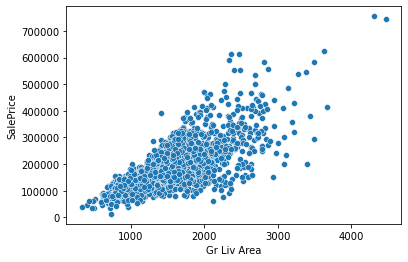

In [607]:
#Visualize the data to be used for the model
sb.scatterplot(x='Gr Liv Area', y='SalePrice', data=df_train)

### Column Manipulation
1. Removing columns which have too many NaN values or which do not have any role to play in the decision making process
2. Observing missing column data
3. Filling in missing column data 

In [608]:
#Remove features which do not play a part in the decision making process 
candidates=['Order', 'PID']
#candidates=['PID']
df_train = df_train.drop([x for x in candidates if x in df_train.columns], axis=1)

In [609]:
#Remove features which have more than 15% data missing in them to remove NaN values  
nan_col = ['Lot Frontage', 'Fireplace Qu', 'Pool QC','Misc Feature','Alley','Fence']
df_train = df_train.drop([x for x in nan_col if x in df_train.columns], axis=1)

In [610]:
#Remove features which have repeatitive values, e.g. features "Garage Cond" and "Garage Qual"
similar_col = ['Exter Cond', 'Bsmt Cond', 'Condition 2', 'Garage Cond', 'Exterior 2nd']
df_train = df_train.drop([x for x in similar_col if x in df_train.columns], axis=1)

In [611]:
#Replace columns which have similar values with column containing the average of the two and then drop the original features
df_train['Overall Rating'] = (df_train['Overall Qual']+df_train['Overall Cond'])/2
avg_col = ['Overall Qual', 'Overall Cond']
df_train = df_train.drop([x for x in avg_col if x in df_train.columns], axis=1)

In [612]:
#After looking at the data remove features which have minimal variations and effect on prediction after removal
min_effect_col = ['Street', 'Utilities', 'Heating', 'Land Slope', 'Yr Sold', 'Misc Val', 'Low Qual']
df_train = df_train.drop([x for x in min_effect_col if x in df_train.columns], axis=1)

In [613]:
#Fill missing data as numerical or categorical data
numerical_cols = ['Mas Vnr Area', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df_train[numerical_cols] = df_train[numerical_cols].fillna(0)
categorical_cols = ['Mas Vnr Type', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Bsmt Qual', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Electrical']
df_train[categorical_cols] = df_train[categorical_cols].fillna('None')

## Feature Selection
Select top 20 features from the remaining features which will be used for predicting the price of houses.

In [614]:
#Store all numerical and categorical data in separate variables. These variables will be used for selection of the features only.
df_num = df_train.select_dtypes(exclude='object')
df_cat = df_train.select_dtypes(include='object')

In [615]:
#Check the correlation of the numerical data with the SalePrice. Select the correlation 0.49 and above or -0.49 and below.
df_num.corr()['SalePrice'].sort_values()

Enclosed Porch    -0.147684
Kitchen AbvGr     -0.129378
MS SubClass       -0.094086
Low Qual Fin SF   -0.055212
Bsmt Half Bath    -0.032130
BsmtFin SF 2       0.021327
3Ssn Porch         0.031639
Mo Sold            0.035368
Pool Area          0.079730
Screen Porch       0.119186
Bedroom AbvGr      0.144990
Bsmt Unf SF        0.177346
Garage Yr Blt      0.259126
2nd Flr SF         0.265679
Lot Area           0.274663
Bsmt Full Bath     0.280946
Half Bath          0.281840
Open Porch SF      0.326931
Wood Deck SF       0.344982
BsmtFin SF 1       0.463020
Fireplaces         0.487570
TotRms AbvGrd      0.492256
Mas Vnr Area       0.514827
Year Remod/Add     0.531928
Full Bath          0.548822
Year Built         0.560634
Overall Rating     0.602255
Garage Area        0.642350
Garage Cars        0.644456
1st Flr SF         0.650443
Total Bsmt SF      0.665207
Gr Liv Area        0.726297
SalePrice          1.000000
Name: SalePrice, dtype: float64

In [616]:
#Create a new dataframe with the final features for prediction. Right now it contains only features which have numerical data.
df_num = df_train.filter(['Gr Liv Area', 'Total Bsmt SF', '1st Flr SF', 'Garage Cars', 'Garage Area', 'Overall Rating', 'Year Built', 'Full Bath', 'Year Remod/Add', 'Mas Vnr Area', 'SalePrice'], axis=1)

In [617]:
#Adding categorical features and selecting them from df_cat. 
df_cat = df_train.filter(['Neighborhood', 'Kitchen Qual', 'Garage Type', 'Garage Finish', 'Heating QC', 'Bldg Type', 'House Style', 'Lot Config', 'Exterior 1st', 'Exter Qual'], axis=1)

In [618]:
df_cat.head()

,Neighborhood,Kitchen Qual,Garage Type,Garage Finish,Heating QC,Bldg Type,House Style,Lot Config,Exterior 1st,Exter Qual
0,SawyerW,Gd,Detchd,RFn,Ex,1Fam,1Story,Corner,VinylSd,Gd
1,SawyerW,Gd,Attchd,RFn,Gd,1Fam,1Story,CulDSac,HdBoard,Gd
2,Timber,Gd,Basment,RFn,Gd,1Fam,SLvl,CulDSac,HdBoard,TA
3,NridgHt,Ex,Attchd,RFn,Ex,TwnhsE,1Story,Inside,VinylSd,Ex
4,Gilbert,Gd,BuiltIn,Fin,Ex,1Fam,SLvl,Inside,VinylSd,Gd


In [619]:
df_cat = pd.get_dummies(df_cat, drop_first=True)

In [620]:
df_cat.head()

,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_Po,Kitchen Qual_TA,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_None,Garage Finish_None,Garage Finish_RFn,Garage Finish_Unf,Heating QC_Fa,Heating QC_Gd,Heating QC_Po,Heating QC_TA,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_PreCast,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [621]:
df_train_final = pd.concat([df_num, df_cat], axis=1)

In [622]:
df_train_final.head()

,Gr Liv Area,Total Bsmt SF,1st Flr SF,Garage Cars,Garage Area,Overall Rating,Year Built,Full Bath,Year Remod/Add,Mas Vnr Area,SalePrice,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_Po,Kitchen Qual_TA,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_None,Garage Finish_None,Garage Finish_RFn,Garage Finish_Unf,Heating QC_Fa,Heating QC_Gd,Heating QC_Po,Heating QC_TA,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_PreCast,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA
0,1218,1218.0,1218,2.0,576.0,6.5,2007,1,2007,0.0,159000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,2196,2158.0,2196,3.0,701.0,7.0,1990,2,1991,234.0,271900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,1344,819.0,1344,2.0,525.0,6.0,1958,1,1958,541.0,137500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,1456,1451.0,1456,2.0,539.0,7.0,2008,2,2008,500.0,248500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1374,384.0,744,2.0,400.0,6.0,2004,2,2004,0.0,167000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


## Test Dataset
Import the test and target dataset and merge them. This will be helpful while testing the accuracy of the models created.

In [624]:
#Import the test dataset
df_test = pd.read_csv("../Dataset/test.csv")

In [625]:
#Import the target dataset
df_target = pd.read_csv("../Dataset/target.csv")

In [626]:
#Merge the test and target dataframes based on the Order number. This dataframe will be used for testing the model.
df_test = pd.merge(df_test, df_target, on='Order')

In [810]:
df_test.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,2127,907135180,20,RL,60.0,8070,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,4,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,588.0,Unf,0.0,402.0,990.0,GasA,Ex,Y,SBrkr,990,0,0,990,1.0,0.0,1,0,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,123600
1,193,903206120,75,RL,NaN,7793,Pave,NaN,IR1,Bnk,AllPub,Corner,Gtl,BrkSide,Norm,Norm,1Fam,2.5Unf,7,7,1922,2005,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,Gd,TA,No,BLQ,474.0,Unf,0.0,634.0,1108.0,GasA,TA,N,FuseA,1160,908,0,2068,0.0,0.0,1,1,3,1,Gd,8,Typ,1,Gd,Detchd,1928.0,Unf,1.0,315.0,TA,TA,Y,0,0,60,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,209500
2,2407,528181040,120,RL,40.0,6792,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,TwnhsE,1Story,7,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,Stone,94.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1368.0,1368.0,GasA,Ex,Y,SBrkr,1368,0,0,1368,0.0,0.0,2,0,2,1,Gd,6,Typ,1,Gd,Attchd,2005.0,RFn,2.0,474.0,TA,TA,Y,132,35,0,0,0,0,NaN,NaN,NaN,0,3,2006,New,Partial,202665
3,46,528175010,120,RL,44.0,6371,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,TwnhsE,1Story,7,5,2009,2010,Gable,CompShg,VinylSd,VinylSd,Stone,128.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,733.0,Unf,0.0,625.0,1358.0,GasA,Ex,Y,SBrkr,1358,0,0,1358,1.0,0.0,2,0,2,1,Gd,6,Typ,1,Gd,Attchd,2010.0,RFn,2.0,484.0,TA,TA,Y,192,35,0,0,0,0,NaN,NaN,NaN,0,6,2010,New,Partial,224000
4,2478,531379030,60,RL,70.0,8304,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,2Story,6,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,941.0,941.0,GasA,Ex,Y,SBrkr,941,896,0,1837,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,Attchd,1997.0,RFn,2.0,688.0,TA,TA,Y,150,165,0,0,0,0,NaN,GdPrv,NaN,0,7,2006,WD,Normal,187000


In [627]:
#Numerical feature selection for the test dataset. 
df_test_num = df_test.filter(['Gr Liv Area', 'Total Bsmt SF', '1st Flr SF', 'Garage Cars', 'Garage Area', 'Overall Rating', 'Year Built', 'Full Bath', 'Year Remod/Add', 'Mas Vnr Area', 'SalePrice'], axis=1)

In [628]:
#Categorical feature selection for the test dataset. 
df_test_cat = df_test.filter(['Neighborhood', 'Kitchen Qual', 'Garage Type', 'Garage Finish', 'Heating QC', 'Bldg Type', 'House Style', 'Lot Config', 'Exterior 1st', 'Exter Qual'], axis=1)

In [629]:
#Fill the missing data with some default value.
df_test_num['Mas Vnr Area'] = df_test_num['Mas Vnr Area'].fillna(0)
categorical_cols = ['Garage Type', 'Garage Finish']
df_test_cat[categorical_cols] = df_test_cat[categorical_cols].fillna('None')

In [630]:
#Change the categorical data into columns and give them boolean values.
df_test_cat = pd.get_dummies(df_test_cat, drop_first=True)

In [631]:
#Concatenate the numerical and categorical columns to get a final test dataframe.
df_test_final = pd.concat([df_test_num, df_test_cat], axis=1)

### Drop columns from train which are not in test
Some columns present in train are not present in test dataset. So we drop the olumns from train dataset. We are doing this to make the training dataset and test dataset look similar so that there are no differences while training and the prediction can be as accurate as possible.

In [632]:
#Find the column difference between the two dataframes.
train_cols = df_train_final.columns
test_cols = df_test_final.columns
train_not_test = train_cols.difference(test_cols)

In [633]:
#Column difference
train_not_test

Index(['Exterior 1st_CBlock', 'Exterior 1st_ImStucc', 'Exterior 1st_PreCast',
       'Exterior 1st_Stone', 'Heating QC_Po', 'Kitchen Qual_Po',
       'Neighborhood_Landmrk', 'Overall Rating'],
      dtype='object')

In [636]:
df_train_final = df_train_final.drop(columns=train_not_test)

## Model implementation
Implementing Linear Regression, XGBoost, Gradient Boosting Regressor and Random Forest on the training dataset. We split the training dataset into train and validation datasets. First train the models on the training dataset and then check the accuracy on the validation dataset.

In [676]:
#Features based on which prediction should be made.
X = df_train_final.drop('SalePrice', axis=1)

In [677]:
#Prediction values
y = df_train_final['SalePrice']

In [698]:
#Splitting the dataset into train and validation.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=90)

### Linear Regression
We split the training dataset into training and validation sets and check the accuracy of the model on the validation dataset.

In [805]:
reg = LinearRegression()

In [806]:
#Training the model using the train dataset.
reg.fit(X_train, y_train)

LinearRegression()

In [807]:
#Accuracy of the model in the validation dataset.
acc = reg.score(X_test, y_test)*100
acc = round(acc, 4)
acc

85.9423

In [808]:
#Store the value of the predictions in y_pred
y_pred = reg.predict(X_test)

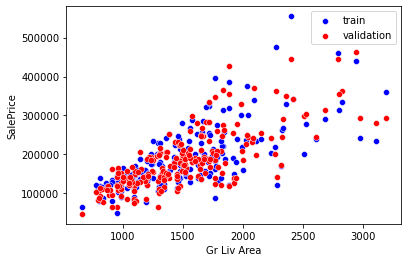

In [809]:
#Plot a graph between the actual value and the predicted value
fig, ax = plt.subplots()
sb.scatterplot(x=X_test['Gr Liv Area'], y=y_test, color='blue', label='train')
sb.scatterplot(x=X_test['Gr Liv Area'], y=y_pred, color='red', label='validation', ax=ax)
plt.show()

### XGBoost
We use the same training data to see the output in XGBoost ensemble model.

In [800]:
model = XGBRegressor(learning_rate = 0.1, max_depth = 5, alpha = 10)

In [801]:
#Training the model using the train dataset.
model.fit(X_train, y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=10, ...)

In [802]:
#Accuracy of the model in the validation dataset.
acc = model.score(X_test, y_test)*100
acc = round(acc, 4)
acc

87.6924

In [803]:
#Store the value of the predictions in y_pred
y_pred = model.predict(X_test)

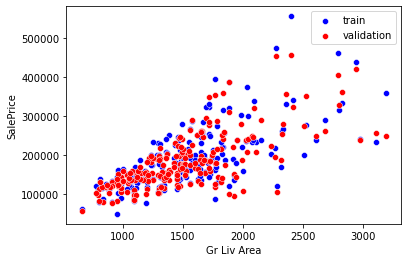

In [804]:
#Plot a graph between the actual value and the predicted value
fig, ax = plt.subplots()
sb.scatterplot(x=X_test['Gr Liv Area'], y=y_test, color='blue', label='train')
sb.scatterplot(x=X_test['Gr Liv Area'], y=y_pred, color='red', label='validation', ax=ax)
plt.show()

### Gradient Boosting Regressor
We use the same training data to see the output in Gradient Boosting Regressor ensemble model.

In [795]:
clf = ensemble.GradientBoostingRegressor(n_estimators=100, max_depth=5, min_samples_split=2, 
                                         learning_rate=0.1, loss='squared_error')

In [796]:
#Training the model using the train dataset.
clf.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5)

In [797]:
#Accuracy of the model in the validation dataset.
acc = clf.score(X_test, y_test)*100
acc = round(acc, 4)
acc

87.3939

In [798]:
#Store the value of the predictions in y_pred
y_pred = clf.predict(X_test)

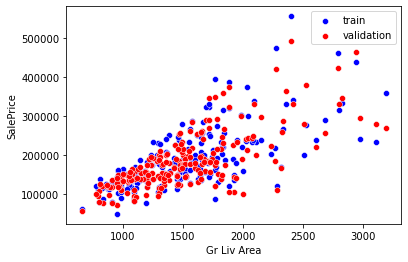

In [799]:
#Plot a graph between the actual value and the predicted value
fig, ax = plt.subplots()
sb.scatterplot(x=X_test['Gr Liv Area'], y=y_test, color='blue', label='train')
sb.scatterplot(x=X_test['Gr Liv Area'], y=y_pred, color='red', label='validation', ax=ax)
plt.show()

### Random Forest
We use the same training data to see the output in Random Forest ensemble model.

In [851]:
rft = RandomForestRegressor(max_depth=9, random_state=0)

In [852]:
#Training the model using the train dataset.
rft.fit(X_train, y_train)

RandomForestRegressor(max_depth=9, random_state=0)

In [853]:
#Accuracy of the model in the validation dataset.
acc = rft.score(X_test, y_test)*100
acc = round(acc, 4)
acc

86.3458

In [854]:
#Store the value of the predictions in y_pred
y_pred = rft.predict(X_test)

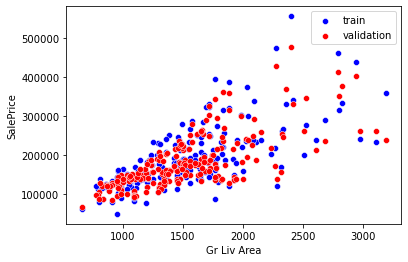

In [849]:
#Plot a graph between the actual value and the predicted value
fig, ax = plt.subplots()
sb.scatterplot(x=X_test['Gr Liv Area'], y=y_test, color='blue', label='train')
sb.scatterplot(x=X_test['Gr Liv Area'], y=y_pred, color='red', label='validation', ax=ax)
plt.show()

## Performance of models on Test Dataset
Check the accuracy of the models trained above on the unseen test dataset.

In [717]:
#Test dataset with columns on which the prediction should be made.
test_data = df_test_final.drop('SalePrice', axis=1)

In [772]:
#Target value of the sale price.
test_target = df_test_final['SalePrice']

#### Linear Regression

In [773]:
#Accuracy on test dataset while implementing Linear Regression
test_accuracy = reg.score(test_data, test_target)*100
test_accuracy = round(test_accuracy,4)
test_accuracy

86.8299

In [779]:
#Store the value of the predictions in y_pred
y_pred = reg.predict(test_data)

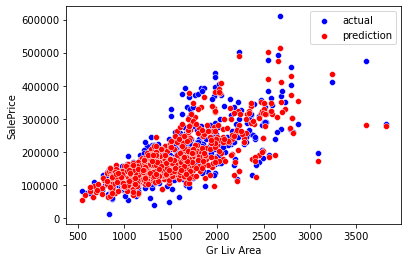

In [790]:
fig, ax = plt.subplots()
sb.scatterplot(x=test_data['Gr Liv Area'], y=test_target, color='blue', label='actual')
sb.scatterplot(x=test_data['Gr Liv Area'], y=y_pred, color='red', label='prediction', ax=ax)
plt.show()

#### XGBoost

In [781]:
#Accuracy on test dataset while implementing XGBoost
test_accuracy = model.score(test_data, test_target)*100
test_accuracy = round(test_accuracy,4)
test_accuracy

88.1377

In [782]:
#Store the value of the predictions in y_pred
y_pred = model.predict(test_data)

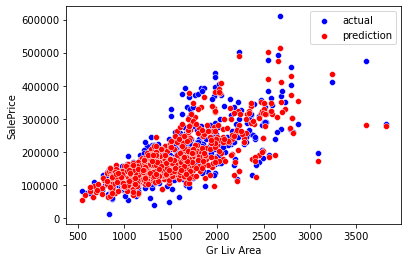

In [789]:
fig, ax = plt.subplots()
sb.scatterplot(x=test_data['Gr Liv Area'], y=test_target, color='blue', label='actual')
sb.scatterplot(x=test_data['Gr Liv Area'], y=y_pred, color='red', label='prediction', ax=ax)
plt.show()

#### Gradient Boosting Regressor

In [785]:
##Accuracy on test dataset while implementing Gradient Boosting Regressor
test_accuracy = clf.score(test_data, test_target)*100
test_accuracy = round(test_accuracy,4)
test_accuracy

87.8749

In [786]:
#Store the value of the predictions in y_pred
y_pred = clf.predict(test_data)

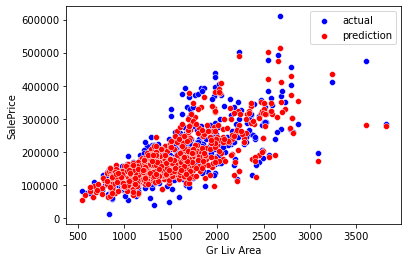

In [788]:
fig, ax = plt.subplots()
sb.scatterplot(x=test_data['Gr Liv Area'], y=test_target, color='blue', label='actual')
sb.scatterplot(x=test_data['Gr Liv Area'], y=y_pred, color='red', label='prediction', ax=ax)
plt.show()

#### Random Forest

In [855]:
##Accuracy on test dataset while implementing Random Forest
test_accuracy = rft.score(test_data, test_target)*100
test_accuracy = round(test_accuracy,4)
test_accuracy

88.1165

In [856]:
#Store the value of the predictions in y_pred
y_pred = rft.predict(test_data)

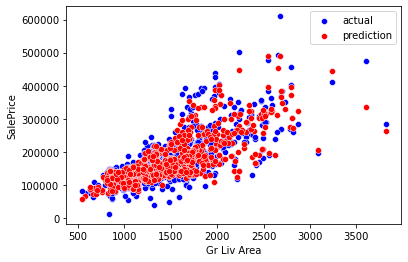

In [857]:
fig, ax = plt.subplots()
sb.scatterplot(x=test_data['Gr Liv Area'], y=test_target, color='blue', label='actual')
sb.scatterplot(x=test_data['Gr Liv Area'], y=y_pred, color='red', label='prediction', ax=ax)
plt.show()